# 4_ Task

Представьте, что вы получили задание от заказчика. Вас просят реализовать простую имитацию локальной сети, состоящую из набора серверов, соединенных между собой через роутер.

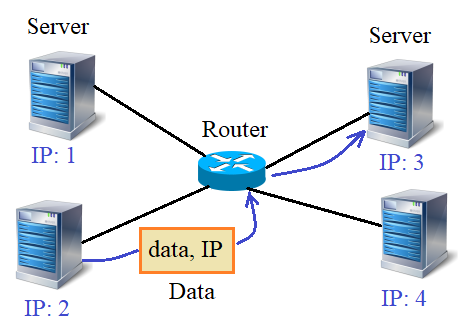

Каждый сервер может отправлять пакет любому другому серверу сети. Для этого у каждого есть свой уникальный IP-адрес. Для простоты - это просто целое (натуральное) число от 1 и до N, где N - общее число серверов. Алгоритм следующий. Предположим, сервер с IP = 2 собирается отправить пакет информации серверу с IP = 3. Для этого, он сначала отправляет пакет роутеру, а уже тот, смотрит на IP-адрес и пересылает пакет нужному узлу (серверу).

Для реализации этой схемы программе предлагается объявить три класса:

**Server** - для описания работы серверов в сети;

**Router** - для описания работы роутеров в сети (в данной задаче полагается один роутер);

**Data** - для описания пакета информации.

Серверы будут создаваться командой:
```Py
sv = Server()
```
При этом, уникальный IP-адрес каждого сервера должен формироваться автоматически при создании нового экземпляра класса Server.

Далее, роутер должен создаваться аналогичной командой:
```Py
router = Router()
```
А, пакеты данных, командой:
```Py
data = Data(строка с данными, IP-адрес назначения)
```
Для формирования и функционирования локальной сети, в классе Router должны быть реализованы следующие методы:

**link(server)** - для присоединения сервера server (объекта класса Server) к роутеру (для простоты, каждый сервер соединен только с одним роутером);

**unlink(server)** - для отсоединения сервера server (объекта класса Server) от роутера;

**send_data()** - для отправки всех пакетов (объектов класса Data) из буфера роутера соответствующим серверам (после отправки буфер должен очищаться).

И одно обязательное локальное свойство (могут быть и другие свойства):

**buffer** - список для хранения принятых от серверов пакетов (объектов класса Data).

Класс Server должен содержать свой набор методов:

**send_data(data)** - для отправки информационного пакета data (объекта класса Data) с указанным IP-адресом получателя (пакет отправляется роутеру и сохраняется в его буфере - локальном свойстве buffer);

**get_data()** - возвращает список принятых пакетов (если ничего принято не было, то возвращается пустой список) и очищает входной буфер;

**get_ip()** - возвращает свой IP-адрес.

Соответственно в объектах класса Server должны быть локальные свойства:

**buffer** - список принятых пакетов (объекты класса Data, изначально пустой);

**ip** - IP-адрес текущего сервера.

Наконец, объекты класса Data должны содержать два следующих локальных свойства:

**data** - передаваемые данные (строка);

**ip** - IP-адрес назначения.

Пример использования этих классов (эти строчки в программе писать не нужно):
```Py
router = Router()
sv_from = Server()
sv_from2 = Server()
router.link(sv_from)
router.link(sv_from2)
router.link(Server())
router.link(Server())
sv_to = Server()
router.link(sv_to)
sv_from.send_data(Data("Hello", sv_to.get_ip()))
sv_from2.send_data(Data("Hello", sv_to.get_ip()))
sv_to.send_data(Data("Hi", sv_from.get_ip()))
router.send_data()
msg_lst_from = sv_from.get_data()
msg_lst_to = sv_to.get_data()
```
Ваша задача реализовать классы Router, Server и Data в соответствии с приведенным техническим заданием (ТЗ). Что-либо выводить на экран не нужно.

In [1]:
class Server:
    __ip = 1
    def __init__(self):
        self.ip =Server.__ip
        Server.__ip+=1
        self.buffer = []
        self.router = None 
    def get_ip(self):
        return self.ip
    def get_data(self):
        tempbuffer = list(self.buffer)
        self.buffer.clear()
        return tempbuffer 
    def send_data(self, data):
        if self.router:
            self.router.buffer.append(data)

class Router:
    def __init__(self):
        self.buffer = []
        self.router = 1 
        self.dict_servers = {}
    def send_data(self):
        for data in self.buffer:
            if data.ip in self.dict_servers:
                self.dict_servers[data.ip].buffer.append(data)
        tempbuffer = list(self.buffer)
        self.buffer.clear()

    def link (self, server):
        self.dict_servers[server.get_ip()]=server
        server.router = self
    def unlink (self,server):
        del self.dict_servers[server.ip]
        server.router = None
    
class Data:
    def __init__(self,data,ip):
        self.data = data
        self.ip = ip
    def get_data(self):
        return self.data
    



# Проверки

In [2]:

assert hasattr(Router, 'link') and hasattr(Router, 'unlink') and hasattr(Router, 'send_data'), "в классе Router присутсвутю не все методы, указанные в задании"
assert hasattr(Server, 'send_data') and hasattr(Server, 'get_data') and hasattr(Server, 'get_ip'), "в классе Server присутсвутю не все методы, указанные в задании"
router = Router()
sv_from = Server()
sv_from2 = Server()
router.link(sv_from)
router.link(sv_from2)
router.link(Server())
router.link(Server())
sv_to = Server()
router.link(sv_to)
sv_from.send_data(Data("Hello", sv_to.get_ip()))
sv_from2.send_data(Data("Hello", sv_to.get_ip()))
sv_to.send_data(Data("Hi", sv_from.get_ip()))
router.send_data()
msg_lst_from = sv_from.get_data()
msg_lst_to = sv_to.get_data()
assert len(router.buffer) == 0, "после отправки сообщений буфер в роутере должен очищаться"
assert len(sv_from.buffer) == 0, "после получения сообщений буфер сервера должен очищаться"
assert len(msg_lst_to) == 2, "метод get_data вернул неверное число пакетов"
assert msg_lst_from[0].data == "Hi" and msg_lst_to[0].data == "Hello", "данные не прошли по сети, классы не функционируют должным образом"
assert hasattr(router, 'buffer') and hasattr(sv_to, 'buffer'), "в объектах классов Router и/или Server отсутствует локальный атрибут buffer"
router.unlink(sv_to)
sv_from.send_data(Data("Hello", sv_to.get_ip()))
router.send_data()
msg_lst_to = sv_to.get_data()
assert msg_lst_to == [], "метод get_data() вернул неверные данные, возможно, неправильно работает метод unlink()"